## 학습목표
- 감성분석 모델링을 할 수 있다
- 토큰화/수치화 방법을 이해할 수 있다
- konlpy 사용법을 이해할 수 있다

### 감성분석
- 사람의 감정/기분/태도 등을 분석하는 기법
- case 1 : 감성사전을 이용한 분석(전통적으로 사용하던 방식)
- case 2 : 인공지능 기술을 이용한 분석(최근방식)

#### 데이터로딩

In [114]:
import pandas as pd

In [115]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자

#### 데이터 전처리
- 형태소 단위로 분리
- clean 작업 : 불용어/반복적인 단어 처리 등 -> 정규표현식

In [116]:
# 한국어 형태소 분리시 자주 활용하는 konlpy를 사용
# 1. jdk, jpye 등을 설치 -> PC상태에 따라서 안되는 경우 많음 -> colab으로 진행
# 2. konlpy 형태소 분석기 중에서 mecab이 있음 -> 리눅스 운영체제에서 사용 가능 -> colab으로 진행

In [117]:
# 문장데이터만 분리하여 파일로 저장
train['문장'].to_csv("./data/train_origin_text.csv", index=False)
test['문장'].to_csv("./data/test_origin_text.csv", index=False)

In [118]:
# 'ex05_2_텍스트마이닝 응용_konlpy_사용하기' 파일에서 처리한 데이터 로딩
import pickle

In [119]:
with open("./data/clean_morphs_train.pkl",'rb') as f:
    clean_morphs_train = pickle.load(f)
with open("./data/clean_morphs_test.pkl",'rb') as f:
    clean_morphs_test = pickle.load(f)

In [120]:
print(len(clean_morphs_train))
print(len(clean_morphs_test))

15005
3737


In [121]:
clean_morphs_train[:5]

[['일안', '시간', '어서', '그런', '아닐까'],
 ['아동',
  '성범죄',
  '페도버는',
  '기록',
  '영원히',
  '고통',
  '는다',
  '무슬림',
  '근친',
  '까지',
  '떨어지',
  '출산',
  '위험'],
 ['루나', '솔로', '앨범', '나왔', '부터', '기운', '진짜'],
 ['어버이',
  '연합',
  '인가',
  '보내',
  '이런',
  '뎃글',
  '는데',
  '이거',
  '어버이',
  '연합',
  '신고',
  '그쪽',
  '에서',
  '고소',
  '가능'],
 ['여기',
  '여자',
  '김치',
  '라고',
  '먼저',
  '불렸',
  '여자',
  '심하',
  '그런다',
  '이렇게',
  '싸우',
  '나쁜',
  '이상',
  '이하',
  '아닌데']]

#### 토큰화 및 수치화(특성추출)
- 토큰화 : 일정 단위로 텍스트를 분리하는 작업
    - 글자(char) : apple -> a / p / p / l / e
    - 단어(word) : 보통 띄어쓰기 기준으로 분리 -> 보통 / 띄어쓰기/ 기준으로 / 분리
    - 형태소 : 동사, 명사, 형용사, 등 형태소 기준으로 분리
    - n-gram(유니, 바이, 트라이 등) : 1/2/3개 씩 단어를 묶어서 토큰화하는 방법
        - 오늘 점심은 맛있는 카레 -> 유니그램 -> 오늘 / 점심은 / 맛있는 / 카레
        - 오늘 점심은 맛있는 카레 -> 바이그램 -> 오늘 점심은 / 점심은 맛있는 / 맛있는 카레
        - 오늘 점심은 맛있는 카레 -> 트라이그램 -> 오늘 점심은 맛있는 / 점심은 맛있는 카레
- 수치화(특성추출) : 의미있는 정보를 담고 있는 숫자형태로 변환하는 방법, 데이터를 정형화하는 효과가 있다
    - 빈도기반의 레이블인코딩
    - 원핫인코딩과 유사한 BOW, Tf-idf
    - Word embedding : 딥러닝 학습을 이용해서 수치화 하는 기법

##### BOW(Bag Of Word)
- 문장에서 등장하는 단어의 빈도를 측정해 수치화하는 방법 -> 원핫인코딩과 흡사
- 단어사전 구축 -> 단어사전을 기반으로 문장내의 단어 빈도를 측정
- 장점 : 단순한 알고리즘이라 이해하기가 편하다
- 단점 : 말뭉치에 사용되는 단어가 많으면 부피가 비례해서 커진다 / 문장에서 단어의 순서를 고려 X
    (문맥을 파악하는 분석에는 부적합)

In [122]:
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
sample_text = clean_morphs_train[:3]
sample_cv = CountVectorizer() # BOW를 해주는 객체 생성
print(sample_text[0])
print(sample_text[1])
print(sample_text[2])

['일안', '시간', '어서', '그런', '아닐까']
['아동', '성범죄', '페도버는', '기록', '영원히', '고통', '는다', '무슬림', '근친', '까지', '떨어지', '출산', '위험']
['루나', '솔로', '앨범', '나왔', '부터', '기운', '진짜']


In [124]:
# step 1 : 토큰화 및 단어사전 구축
# countvectorizer에 토큰화 기능이 내장되어 있어 문장을 하나로 묶어주는 전처리 작업
sample_text2 = [ " ".join(s) for s in sample_text] 
sample_cv.fit(sample_text2)

CountVectorizer()

In [125]:
# 구축된 단어사전 확인 -> 25개 단어 등장
sample_cv.vocabulary_

{'일안': 21,
 '시간': 14,
 '어서': 18,
 '그런': 1,
 '아닐까': 15,
 '아동': 16,
 '성범죄': 12,
 '페도버는': 24,
 '기록': 3,
 '영원히': 19,
 '고통': 0,
 '는다': 7,
 '무슬림': 10,
 '근친': 2,
 '까지': 5,
 '떨어지': 8,
 '출산': 23,
 '위험': 20,
 '루나': 9,
 '솔로': 13,
 '앨범': 17,
 '나왔': 6,
 '부터': 11,
 '기운': 4,
 '진짜': 22}

In [126]:
# step 2 : 단어사전을 기반으로 문장내의 단어빈도를 측정
result = sample_cv.transform(sample_text2)
result

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 25 stored elements and shape (3, 25)>

In [127]:
# 만약 데이터를 직접 보고 싶다면 활용
result.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 1],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0]], dtype=int64)

In [128]:
# 단어사전을 데이터 프레임으로 변환
result_df = pd.DataFrame([sample_cv.vocabulary_.keys()],
                            columns=sample_cv.vocabulary_.values())
result_df = result_df.sort_index(axis=1) # 컬럼을 기준으로 정렬
result_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,고통,그런,근친,기록,기운,까지,나왔,는다,떨어지,루나,...,아닐까,아동,앨범,어서,영원히,위험,일안,진짜,출산,페도버는


In [129]:
pd.concat([result_df, pd.DataFrame(result.toarray())])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,고통,그런,근친,기록,기운,까지,나왔,는다,떨어지,루나,...,아닐까,아동,앨범,어서,영원히,위험,일안,진짜,출산,페도버는
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1,0,1,1,0,1,0,1,1,0,...,0,1,0,0,1,1,0,0,1,1
2,0,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [130]:
# countvetorizer를 이용하기 위해서 문장을 하나로 합쳐주는 작업이 필요
clean_morphs_train2 = [" ".join(s) for s in clean_morphs_train]
clean_morphs_test2 = [" ".join(s) for s in clean_morphs_test]
clean_morphs_train2[:4]

['일안 시간 어서 그런 아닐까',
 '아동 성범죄 페도버는 기록 영원히 고통 는다 무슬림 근친 까지 떨어지 출산 위험',
 '루나 솔로 앨범 나왔 부터 기운 진짜',
 '어버이 연합 인가 보내 이런 뎃글 는데 이거 어버이 연합 신고 그쪽 에서 고소 가능']

In [131]:
unsmile_cv = CountVectorizer(stop_words=["으로","이다","하고","부터"], # 불용어 등록
                            ngram_range=(1,2), # n-gram 설정 (유니~바이)
                            max_df= 0.9, # 최대 등장 빈도
                            min_df= 8) # 최소 등장빈도
                            
unsmile_cv.fit(clean_morphs_train2) # 단어사전 구축

CountVectorizer(max_df=0.9, min_df=8, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [132]:
len(unsmile_cv.vocabulary_) # 단어사전의 크기

2554

In [133]:
# 훈련용과 평가용 데이터 수치화
train_transgformed_BOW = unsmile_cv.transform(clean_morphs_train2)
test_transformed_BOW = unsmile_cv.transform(clean_morphs_test2)

In [134]:
train_transgformed_BOW, test_transformed_BOW

(<Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 88296 stored elements and shape (15005, 2554)>,
 <Compressed Sparse Row sparse matrix of dtype 'int64'
 	with 21155 stored elements and shape (3737, 2554)>)

### 선형분류모델 학습 및 평가

In [135]:
# 정답데이터 추출
y_train = train.loc[:,"여성/가족": "clean"].values.argmax(axis=1)
y_test = test.loc[:,"여성/가족": "clean"].values.argmax(axis=1)

In [136]:
y_train.shape, y_test.shape

((15005,), (3737,))

In [ ]:
from sklearn.linear_model import LogisticRegression # 로지스틱 모델
from sklearn.model_selection import cross_val_score # 교차검증 함수

In [140]:
# 로지스틱 모델 생성
unsmile_logi = LogisticRegression(max_iter=1000)
# 교차검증
score_BOW = cross_val_score(unsmile_logi, train_transgformed_BOW,y_train, cv=5).mean()

In [143]:
score_BOW

0.5864711762745751

##### Tf-dif
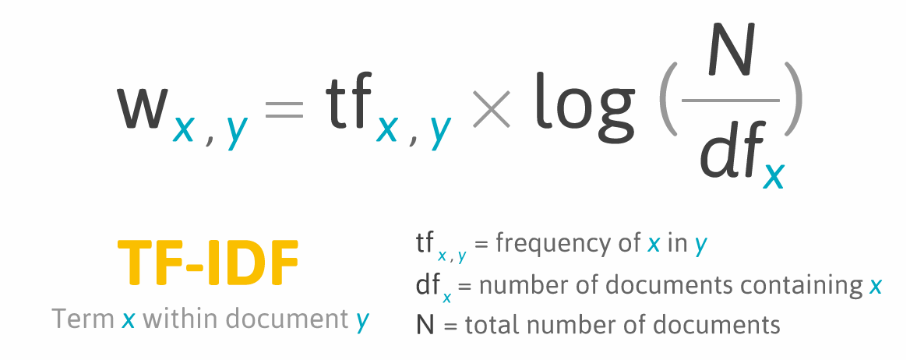
- 말뭉치(corpus) : 텍스트마이닝,자연어처리 분야에서 학습을 위해 사용하는 데이터셋
- 문서(document) : 말뭉치에서 각 샘플을 치징하는 단어
- TF(Term Frequency) : 하나의 문서(document)에서 개별 단어들이 등장하는 빈도 수
- DF(Document Frequency) : 하나의 단어(토큰)가 전체 말뭉치에서 등장하는 문서(document) 수

In [146]:
# tf-idf : 하나의 문서에서는 자주 등장하고 전체 문서에서는 적당히 등장하는 단어의 가치를 측정
from sklearn.feature_extraction.text import TfidfVectorizer

In [147]:
# step 1 : 단어사전 구축
sample_tf_idf = TfidfVectorizer()
sample_tf_idf.fit(sample_text2)

TfidfVectorizer()

In [148]:
# step 2 : 수치화
sample_tf_idf.transform(sample_text2).toarray()

array([[0.        , 0.4472136 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.4472136 ,
        0.4472136 , 0.        , 0.        , 0.4472136 , 0.        ,
        0.        , 0.4472136 , 0.        , 0.        , 0.        ],
       [0.2773501 , 0.        , 0.2773501 , 0.2773501 , 0.        ,
        0.2773501 , 0.        , 0.2773501 , 0.2773501 , 0.        ,
        0.2773501 , 0.        , 0.2773501 , 0.        , 0.        ,
        0.        , 0.2773501 , 0.        , 0.        , 0.2773501 ,
        0.2773501 , 0.        , 0.        , 0.2773501 , 0.2773501 ],
       [0.        , 0.        , 0.        , 0.        , 0.37796447,
        0.        , 0.37796447, 0.        , 0.        , 0.37796447,
        0.        , 0.37796447, 0.        , 0.37796447, 0.        ,
        0.        , 0.        , 0.37796447, 0.        , 0.        ,
        0.        , 0.        , 0.37796447, 0.

##### unsmile 데이터셋 토큰화 및 수치화 : Tf-idf

In [150]:
# 1. tf-idf를 이용해 혐오표현 데이터 토큰화 및 수치화
unsmile_cv_tfidf = TfidfVectorizer(stop_words=["으로","이다","하고","부터"], # 불용어 등록
                            ngram_range=(1,2), # n-gram 설정 (유니~바이)
                            max_df= 0.9, # 최대 등장 빈도
                            min_df= 8) # 최소 등장빈도
                            
unsmile_cv_tfidf.fit(clean_morphs_train2) # 단어사전 구축

TfidfVectorizer(max_df=0.9, min_df=8, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [151]:
# 훈련용과 평가용 데이터 수치화
train_transgformed_tfidf = unsmile_cv_tfidf.transform(clean_morphs_train2)
test_transformed_tfidf = unsmile_cv_tfidf.transform(clean_morphs_test2)

##### 모델링

In [154]:
# 2. 선형분류모델 객체 생성
unsmile_logi_for_tfidf = LogisticRegression(max_iter=1000)

In [157]:
# 3. 교차검증 실시
score_tfidf = cross_val_score(unsmile_logi_for_tfidf, train_transgformed_tfidf, y_train, cv=5).mean()
score_tfidf

0.5751416194601799

#### 하이퍼파라미터 튜닝 with GridSearch
- LogisticRegression : C(규제)
- TfidfVetorizer : ngram_range, max_df,min_df

In [158]:
# tf-idf와 logistic 두 개를 튜닝해보자
# 하나의 파이프라인으로 묶어서 튜닝
from sklearn.pipeline import Pipeline # 파이프라인 구축 클래스
from sklearn.model_selection import GridSearchCV # 하이퍼파라미터 튜닝을 도와주는 클래스 CV : Cross Validation

In [159]:
# 파이프라인 생성
unsmile_pipeline = Pipeline([
    ('unsmile_tf_idf',TfidfVectorizer()),
    ('unsmile_logi', LogisticRegression())
])

In [160]:
# 튜닝할 파라미터 셋팅
grid_prams = {
    'unsmile_logi__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], # 규제가 강한것(0.001)부터 약한것(1000) 까지
    'unsmile_tf_idf__max_df' : [0.7, 0.8, 0.9], # 최대등장 빈도
    'unsmile_tf_idf__min_df' : [5, 8, 10, 15], # 최소등장 빈도 
    'unsmile_tf_idf__ngram_range' : [(1,1), (1,2), (1,3)] # n-gram
}

In [161]:
grid = GridSearchCV(unsmile_pipeline, # 튜닝할 모델
                    grid_prams, # 튜닝할 파라미터
                    cv=3, # 조합당 실행할 교차검증 횟수
                    n_jobs=-1) # PC자원을 연산에 집중시키는 파라미터 

In [163]:
grid.fit(clean_morphs_train2, # 문제 
        y_train) # 정답

c:\Users\chxss\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_tf_idf', TfidfVectorizer()),
                                       ('unsmile_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'unsmile_logi__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                             1000],
                         'unsmile_tf_idf__max_df': [0.7, 0.8, 0.9],
                         'unsmile_tf_idf__min_df': [5, 8, 10, 15],
                         'unsmile_tf_idf__ngram_range': [(1, 1), (1, 2),
                                                         (1, 3)]})

In [164]:
# best score
grid.best_score_

0.5729424287073813

In [165]:
# best param 조합
grid.best_params_

{'unsmile_logi__C': 1,
 'unsmile_tf_idf__max_df': 0.7,
 'unsmile_tf_idf__min_df': 10,
 'unsmile_tf_idf__ngram_range': (1, 2)}

In [167]:
# best model 
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('unsmile_tf_idf',
                 TfidfVectorizer(max_df=0.7, min_df=10, ngram_range=(1, 2))),
                ('unsmile_logi', LogisticRegression(C=1))])

In [168]:
# 베스트모델 저장
with open("./data/best_unsmile_model.pkl", 'wb') as f :
    pickle.dump(best_model, f)

##### 테스트데이터 활용 평가 및 시각화

In [169]:
# 분류평가지표 리포팅(정확도, 재현율, 정밀도, f1-score 확인 가능)
from sklearn.metrics import classification_report

In [172]:
train.columns

Index(['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오',
       '악플/욕설', 'clean', '개인지칭'],
      dtype='object')

In [171]:
y_pre = best_model.predict(clean_morphs_test2)
print(classification_report(y_test, y_pre)) # 실제정답, 예측값

              precision    recall  f1-score   support

           0       0.66      0.55      0.60       394
           1       0.81      0.63      0.71       325
           2       0.81      0.59      0.68       261
           3       0.73      0.61      0.66       387
           4       0.89      0.26      0.41       122
           5       0.82      0.72      0.77       222
           6       0.82      0.62      0.70       223
           7       0.31      0.05      0.08        82
           8       0.46      0.49      0.48       786
           9       0.50      0.75      0.60       935

    accuracy                           0.60      3737
   macro avg       0.68      0.53      0.57      3737
weighted avg       0.63      0.60      0.60      3737

